In [3]:
import math as m
def k(x,y):
    k =  (y - 2*x**2)
    return k
k(1,1)

-1

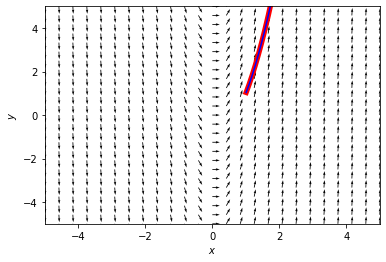

In [2]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (4*x[0])
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[1,1]]
color=['r']
listY = []

for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,25),np.linspace(-5,5,25) )

V = (4*X)

##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

y_exact = (-1) + 2*S[:,0]**2 
plt.plot(S[:,0], y_exact, color = "b")


##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

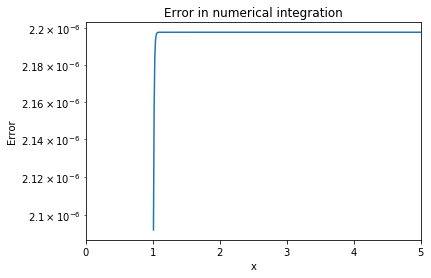

In [4]:
y_diff = np.abs(y_exact - listY)
plt.semilogy(S[:,0], y_diff)
plt.xlim(0,5)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 